# Bonus Tutorial 1- Data Frames

Data frames are tables with rows and columns. Once we create a data frame or read it from a .csv or excel file, we can use statistical or visualizing tools to interpret the data that we have. Before working with the data, we usually perform an Exploratory Data Analysis (EDA) to get some insights from the data and to understand the dataset better. It also gives some ideas about how to do other related tasks in a more efficient way. 

In this tutorial, I will give the basics of data frames, which can be used as a reference notebook, as well. We will be using pandas package, which is one of the most common data analysis toolkit used by data scientist to handle data. 

https://pandas.pydata.org/pandas-docs/stable/

We will also be using numpy package (a scientific computation package) for some mathematical expressions. For the numpy package please take a look at https://docs.scipy.org/doc/numpy/user/quickstart.html

A quick summary of what this tutorial covers is given below:

<ol>
<li> Creating a Data Frame
<ul>
<li> From a dictionary</li>
<li> Reading data from a csv or excel file</li>
</ul>
</li>
<li> Accessing entries of a data frame
<ul>
<li> Accessing rows or columns of a data frame</li>
<li> Finding rows satisfying given conditions</li>
</ul>
</li>
    
<li>Modifying an existing data frame
<ul>
<li> Adding a new row</li>
<li> Adding a new column</li>
</ul>
</li>
<li>Iteration over rows or columns</li>
<li>Interpreting Data
<ul>
<li>Statistics</li>
<li>Visual tools</li>
<li> Grouping data by groupby and Some Aggregations</li>
</ul>
</ol>

## 1. Creating a Data Frame

We first import pandas and numpy packages.

In [1]:
import pandas as pd
import numpy as np

### Creating a Data Frame from a dictionary

We will first create a data frame from scratch, by using a dictionary. Column names are given as dictionary keys and corresponding entries are given in a list as below. Note that the number of items in each list should be the same. Otherwise, we will get a ValueError.

In [2]:
#from a dictionary
sample_dict={'fruits':['apple','orange','plum','apple','orange'], 'quantity':[2,1,1,3,1]}
days=['mon','tue','wed','thu','fri']
    
df=pd.DataFrame(data=sample_dict, index=days)

#If we don't define index clearly, it will be 0,1,2,3,4.

df

,fruits,quantity
mon,apple,2
tue,orange,1
wed,plum,1
thu,apple,3
fri,orange,1


Let's reset index:

In [3]:
df=df.reset_index()

df

,index,fruits,quantity
0,mon,apple,2
1,tue,orange,1
2,wed,plum,1
3,thu,apple,3
4,fri,orange,1


We can rename columns in the following way:

In [4]:
df=df.rename(columns={'index':'Days', 'fruits':'Fruits'})

df

,Days,Fruits,quantity
0,mon,apple,2
1,tue,orange,1
2,wed,plum,1
3,thu,apple,3
4,fri,orange,1


If you want to choose Fruits column as the index column, you can simply type df.set_index('Fruits') and set df equal to this. That will change the data frame to a data frame with index column set as Fruits column. Since I don't want to change it at this point, the code is turned into a comment with # below.

In [5]:
#df=df.set_index('Fruits')

#df

### Reading data from a csv or excel file

We may also want to read data from a .csv file or an excel file. First, we have to upload the .csv file to the same folder that we are working on. If the .csv file and the worksheet that we are currently working on are not on the same folder, we will get a FileNotFoundError. First, upload the samp.csv file posted on Canvas to the folder. (This process is explained in the first pdf file that I posted on Canvas.)

If you want to learn more about how to work with.csv or excel files, the documentations posted at the following webpages would help:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

After you upload samp.csv, you can read it with pd.read_csv() function as below.

In [6]:
df3=pd.read_csv('samp.csv')

df3

,days,course,hours
0,mon,math,3
1,tue,econ,3
2,wed,history,2
3,thu,math,2
4,fri,econ,2


Now, we can read the content of the csv file in our Jupyter notebook and do all of the things that we will cover below with this new dataframe, as well. Before, we go back to our fruits data, please note that you can save your current data frame to a local directory by using something like this:

df.to_csv(r'C:/Users/HP/Desktop/sample.csv',index=True)

Note that the location that you want to save is probably different than this. Use the path directory to figure out this. 

## 2. Accessing entries of a dataframe

Next, we will see how we can access the entries of a data frame. 

#### To access a column use ...

df[column name]

In [7]:
df['Fruits']

0     apple
1    orange
2      plum
3     apple
4    orange
Name: Fruits, dtype: object

Note that columns and rows of data frames are pandas series. To access a specific entry in that column, we can use indexes as below. 

First, let's see the type of the 'Fruits' column:

In [8]:
type(df['Fruits'])

pandas.core.series.Series

In [9]:
print(df['Fruits'][0],df['Fruits'][2])

apple plum


Note that, if the index was set as the 'days' column, we would have to type df['Fruits']['mon'] to obtain the Fruit for Monday.

#### To access a row by index, use ...

df.loc[index]

In [10]:
df.loc[3]

Days          thu
Fruits      apple
quantity        3
Name: 3, dtype: object

#### To access a single entry, use... 

df.loc[index, column]

In [11]:
df.loc[2,'Days']

'wed'

### To get more than one rows use ...


In [12]:
df.loc[[0,2]]

,Days,Fruits,quantity
0,mon,apple,2
2,wed,plum,1


### Finding rows satisfying given conditions

If there is only one condition, use the following code. Notice that inside df[], we have df['Fruits']=='orange' which gives us all rows with 'orange'. 

In [13]:
df[df['Fruits']=='orange']

,Days,Fruits,quantity
1,tue,orange,1
4,fri,orange,1


If we want to find all rows at least one of two conditions, we write each condition in parantheses and use | instead of or.

In [14]:
df[(df['Days']=='thu') | (df['Days']=='wed')]

,Days,Fruits,quantity
2,wed,plum,1
3,thu,apple,3


If we want to find all rows satisfiying two conditions at the same time, we write each condition in parantheses and use & instead of and.

In [15]:
df[(df['quantity']==1) & (df['Fruits']=='orange')]

,Days,Fruits,quantity
1,tue,orange,1
4,fri,orange,1


## 3. Modifying an existing dataframe

In this section, we will learn how to add rows and columns to an existing dataframe.

### Adding a new row

In [16]:
#adding a new row to the dataframe
extra_row=pd.DataFrame([['sat',np.NaN,1],['sun','plum',np.NaN]],columns=['Days','Fruits','quantity'])

df.append(extra_row,ignore_index=True, sort=True)
#if we don't have ignore_index=True, the indexing will restart with 0 for the newly added row.


,Days,Fruits,quantity
0,mon,apple,2.0
1,tue,orange,1.0
2,wed,plum,1.0
3,thu,apple,3.0
4,fri,orange,1.0
5,sat,NaN,1.0
6,sun,plum,NaN


If your data has missing values, you have to deal with these missing data before you can perform analysis on your data. One method is dropping all rows which has at least one missing value (i.e., indicated by NaN). We could do this by using .dropna(). This will remove rows 5 and 6 from df as they both contain missing values.

In [17]:
df.dropna()

,Days,Fruits,quantity
0,mon,apple,2
1,tue,orange,1
2,wed,plum,1
3,thu,apple,3
4,fri,orange,1


We drop specific rows as follows:

In [18]:
df=df.drop([2,4])

df

,Days,Fruits,quantity
0,mon,apple,2
1,tue,orange,1
3,thu,apple,3


However, if your data has many missing values, or dropping all missing values could significantly change your data (and your analysis), you may have to find other ways of dealing with these missing values.

Other tools for missing values:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna

You could also replace NaN with a value that is reasonable with your data. One of the best ways is replacing missing values NaN with the mean of the column. However, if you use np.mean(), it would be dividing with the total number of elements in that column. If you don't want to include entries with NaN, you could use np.nanmean() for this purpose.

Let's first look at the data:

In [19]:
df

,Days,Fruits,quantity
0,mon,apple,2
1,tue,orange,1
3,thu,apple,3


### Adding a new column

Let's work with another dataframe for this part.

In [20]:
#First, empty lists for the point values:
points=[]
cubic_list=[]

for i in range(0,100):
    x=i**3
    points.append(i)
    cubic_list.append(x)

d2={'points':points,'cubic':cubic_list}
    
df2=pd.DataFrame(d2)

#let's see the first 5 terms:
df2.head()

,points,cubic
0,0,0
1,1,1
2,2,8
3,3,27
4,4,64


Now, let's create a new column by using an old column. For this, we could use built-in functions (e.g., np.sqrt from numpy package for square root) or we could define the function ourselves. 

Note that since our dataframe has a lot of rows, df will be too long to display. So, to check out the data frame, we can use df.head() to see the top 5 elements in the data frame and df.tail() to see the last 5 elements in the dataset. If you want to look at more values, you can mention it as df.head(10), which shows the top 10 rows in the data frame.

In the codes below, I will give different variations of these.

In [21]:
df2["sqrt(cubic)"]=df2["cubic"].apply(np.sqrt)

#to see first 10 terms we write df2.head(10). To see the first 10 terms we could also use df2[0:10]
df2.head(10)

,points,cubic,sqrt(cubic)
0,0,0,0.000000
1,1,1,1.000000
2,2,8,2.828427
3,3,27,5.196152
4,4,64,8.000000
5,5,125,11.180340
6,6,216,14.696938
7,7,343,18.520259
8,8,512,22.627417
9,9,729,27.000000


In [22]:
df2['value by lambda']=df2['cubic'].apply(lambda x: x+1)

#to see the last 5 terms, we use df2.tail()
df2.tail()


,points,cubic,sqrt(cubic),value by lambda
95,95,857375,925.945463,857376
96,96,884736,940.604061,884737
97,97,912673,955.339207,912674
98,98,941192,970.150504,941193
99,99,970299,985.037563,970300


In [23]:
def last_digit(x):
    string_x=str(x)
    last=string_x[-1]
    return 'Last digit of {} is {}.'.format(str(x),last)  

df2['value by function def']=df2['cubic'].apply(last_digit)

#let's look at all the terms between 10 and 30 
df2.head()


,points,cubic,sqrt(cubic),value by lambda,value by function def
0,0,0,0.000000,1,Last digit of 0 is 0.
1,1,1,1.000000,2,Last digit of 1 is 1.
2,2,8,2.828427,9,Last digit of 8 is 8.
3,3,27,5.196152,28,Last digit of 27 is 7.
4,4,64,8.000000,65,Last digit of 64 is 4.


Now, we know how to add columns. Let's see how we drop the columns that we don't want.

In [24]:
df2=df2.drop(columns=['value by lambda'])

#Alternatively, we could use df2.drop(['value by lambda'], axis=1)

df2.head()

,points,cubic,sqrt(cubic),value by function def
0,0,0,0.000000,Last digit of 0 is 0.
1,1,1,1.000000,Last digit of 1 is 1.
2,2,8,2.828427,Last digit of 8 is 8.
3,3,27,5.196152,Last digit of 27 is 7.
4,4,64,8.000000,Last digit of 64 is 4.


## 4. Iteration over rows or columns

### Iteration over rows

We can iterate over rows of a dataframe with df.iterrows() code as below. The type of df.iterrows() is a generator consists of (index, row) tuples. If we want to get rows, we will write a for loop iterating over index, rows (the first is the index of the corresponding row and the second one is the row itself as a series. The result will be a series.

In [25]:
for index, row in df.iterrows():
    if index==1:
        print(row)
    

Days           tue
Fruits      orange
quantity         1
Name: 1, dtype: object


### Iteration over columns

If we want to iterate over columns, we use df.iteritems() to get (column name, column) tuples. Like df.iterrows(), type of df.iteritems() is a generator, as well. 

In [26]:
for name, column in df.iteritems():
    if name=='Days':
        print(column)

0    mon
1    tue
3    thu
Name: Days, dtype: object


## 5. Interpreting Data

### Statistics

If we want to learn basic statistics of our data, we use df.describe():

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

In [27]:
df.describe()


,quantity
count,3.0
mean,2.0
std,1.0
min,1.0
25%,1.5
50%,2.0
75%,2.5
max,3.0


In [28]:
#We can also get the statistics of a single column:

df['quantity'].describe()

count    3.0
mean     2.0
std      1.0
min      1.0
25%      1.5
50%      2.0
75%      2.5
max      3.0
Name: quantity, dtype: float64

In [29]:
df2["cubic"].describe()

count       100.000000
mean     245025.000000
std      280457.581671
min           0.000000
25%       15174.750000
50%      121324.500000
75%      409386.750000
max      970299.000000
Name: cubic, dtype: float64

### Plotting Data 

Visualizing data is a great way of interpreting results. You could learn a lot about your data when you plot it. Now that you know calculus, you can make a lot of predictions about your data by using plots. 

There are several packages that you could use to plot your data. Matplotlib is one of the widely used packages for that purpose. Another well-known and widely used packages are seaborn (https://seaborn.pydata.org/). If you want to create interactive graphs (for example, hover on the graph and it shows you info about that portion of the graph), you could use plotly (https://plot.ly/python/). Here, we will only talk about matplotlib.

For a pyplot function overview, please take a look at 
https://matplotlib.org/3.1.0/api/pyplot_summary.html
This is a great reference webpage. For example, if you want to look at scatterplots, simply click on scatter and learn how you can create scatter plots using matplotlib. 

If you want to learn more about colors and colormaps in matplotlib, please go to
https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html.


If you want to import plotting tool only, import matplotlib.pyplot and give it an alias, a common one is plt so that you can
write plt instead of whole matplotlib.pyplot. A documentation for pyplot is posted at
https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html

In [30]:
import matplotlib.pyplot as plt
#If you want to import everything in matplotlib, write: from matplotlib import *

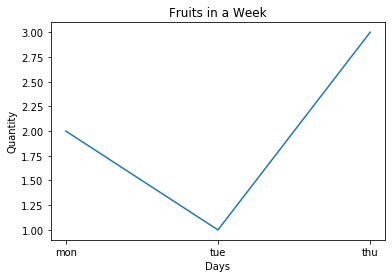

In [31]:
#Now, we are ready to plot our data:

plt.plot(df['Days'],df['quantity'])
plt.xlabel('Days')
plt.ylabel('Quantity')
plt.title('Fruits in a Week')

plt.show()


### Cubic Function graph as a scatterplot:

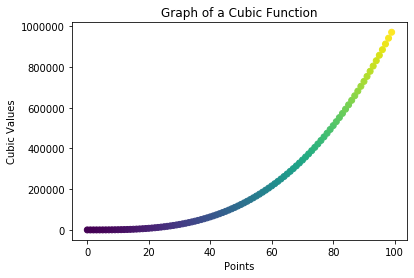

In [32]:
plt.scatter(df2['points'],df2['cubic'],c=df2['sqrt(cubic)'])
plt.xlabel('Points')
plt.ylabel('Cubic Values')
plt.title('Graph of a Cubic Function')

plt.show()

### Grouping data by groupby and Some Aggregations

Sometimes, we want to group data according to a common criteria and try to get some information about it that way. After we group our data, we perform some tasks and we could answer some questions. For this we could use aggregation functions such as mean() for averages, sum() for total values, std() for standard deviation. For a comprehensive coverage, please visit the following webpage:

http://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html




In [33]:
#from a dictionary
sample_dict={'Days':['mon','wed','thu','wed','thu'], 'Hours':[2,3,3,2,1]}
Courses=['Math','Econ','Physics','English','Stat']
    
df=pd.DataFrame(data=sample_dict, index=Courses)

#If we don't define index clearly, it will be 0,1,2,3,4.

df

,Days,Hours
Math,mon,2
Econ,wed,3
Physics,thu,3
English,wed,2
Stat,thu,1


We see that there are 2 hours spent on Monday, a total of 5 hours spent on Wednesday and 4 hours spent on Thursday. Even with this dataset with only five entries, we spent some effort to find this info. Instead, we could use groupby and sum() aggregation and do this effortlessly.

In [34]:
df.groupby('Days').sum()

,Hours
Days,
mon,2
thu,4
wed,5


In [35]:
#we could also do this as below:
df.groupby('Days').agg(np.sum)

,Hours
Days,
mon,2
thu,4
wed,5


In [36]:
#We could also use describe with groupby to get the statistics about the groups:
df.groupby('Days').describe()

Hours                                          
     count mean       std  min   25%  50%   75%  max
Days                                                
mon    1.0  2.0       NaN  2.0  2.00  2.0  2.00  2.0
thu    2.0  2.0  1.414214  1.0  1.50  2.0  2.50  3.0
wed    2.0  2.5  0.707107  2.0  2.25  2.5  2.75  3.0